In [1]:
import nltk
import pandas as pd

In [2]:
#nltk.download_shell()

In [3]:
messages = [line.strip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [6]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label','message'])

In [7]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
messages['Length'] = messages['message'].apply(len)

In [11]:
messages.head()

,label,message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
messages['Length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

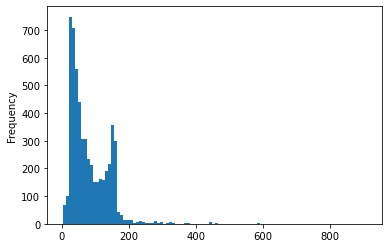

In [15]:
messages['Length'].plot.hist(bins=100)

In [16]:
messages[messages['Length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

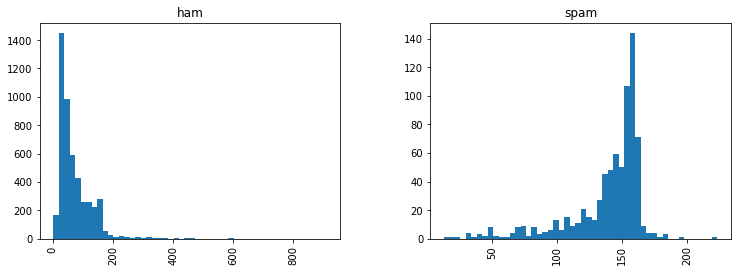

In [17]:
messages.hist(column='Length',by='label',bins=50,figsize=(12,4))

In [18]:
import string

In [19]:
mess = 'sample message! Notice it has a punctuation'

In [20]:
nopunc = [c for c in mess if c not in string.punctuation]

In [21]:
nopunc

['s',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'a',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [22]:
from nltk.corpus import stopwords

In [23]:
k = ['a','b','c','d']

In [24]:
k

['a', 'b', 'c', 'd']

In [25]:
'_'.join(k)

'a_b_c_d'

In [26]:
nopunc = ''.join(nopunc)

In [27]:
nopunc

'sample message Notice it has a punctuation'

In [28]:
nopunc.split()

['sample', 'message', 'Notice', 'it', 'has', 'a', 'punctuation']

In [29]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [30]:
clean_mess

['sample', 'message', 'Notice', 'punctuation']

In [31]:
def text_process(mess):
    """
    1. remove punc
    2. remove stopwords
    3. return list of clean text words
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [32]:
messages.head()

,label,message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [40]:
print(len(bow_transformer.vocabulary_))

11425


In [41]:
mess4 = messages['message'][3]

In [42]:
print(mess4)

U dun say so early hor... U c already then say...


In [44]:
bow4 = bow_transformer.transform([mess4])

In [45]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [46]:
print(bow4.shape)

(1, 11425)


In [49]:
bow_transformer.get_feature_names()[6204]

'dun'

In [50]:
messages_bow = bow_transformer.transform(messages['message'])

In [52]:
print('Shape of sparse matrix : ', messages_bow.shape)

Shape of sparse matrix :  (5572, 11425)


In [54]:
messages_bow.nnz

50548

In [55]:
sparsity = (100.0 * messages_bow.nnz)/(messages_bow.shape[0] * messages_bow.shape[1])

In [58]:
print('sparsity : {}'.format(sparsity))

sparsity : 0.07940295412668218


In [59]:
from  sklearn.feature_extraction.text import TfidfTransformer

In [61]:
tfidf = TfidfTransformer().fit(messages_bow)

In [62]:
tfidf4 = tfidf.transform(bow4)

In [64]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [67]:
tfidf.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [72]:
messages_tfidf = tfidf.transform(messages_bow)

In [73]:
from sklearn.naive_bayes import MultinomialNB

In [74]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [76]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [79]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [78]:
messages['label'][3]

'ham'

In [80]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [81]:
from sklearn.model_selection import train_test_split

In [83]:
message_train, message_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)
                                                                

In [85]:
message_train

1139                                    What * u wearing?
1104    Aiyah sorry lor... I watch tv watch until i fo...
2664    8007 FREE for 1st week! No1 Nokia tone 4 ur mo...
4821    Check Out Choose Your Babe Videos @ sms.shsex....
3209    Oops my phone died and I didn't even know. Yea...
                              ...                        
1862    Aiyah then i wait lor. Then u entertain me. He...
5150    Happy new year to u and ur family...may this n...
4684         Ok u can take me shopping when u get paid =D
5442    I thought i'd get him a watch, just cos thats ...
4891    Sounds like there could be a lot of time spent...
Name: message, Length: 3900, dtype: object

In [91]:
from sklearn.pipeline import Pipeline

In [92]:
pipeline = Pipeline([
    
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [93]:
pipeline.fit(message_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000146A3940430>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [94]:
predictions = pipeline.predict(message_test)

In [95]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1424
        spam       1.00      0.71      0.83       248

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.95      1672



In [98]:
# lets compare this model with Randomforestclassifier

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
pipeline = Pipeline([
    
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [101]:
pipeline.fit(message_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000146A3940430>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [102]:
predictions = pipeline.predict(message_test)

In [103]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1424
        spam       1.00      0.78      0.88       248

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672

